In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import itertools
import seaborn as sns
sns.set()

In [17]:
p_info = pd.read_csv('pre_participants.csv')

In [18]:
summary = pd.DataFrame()
for pid in p_info['pid']:
    data = pd.read_csv('result/' + pid + '_MItask.csv', index_col=0)
    summary = summary.append(data)

In [29]:
data = summary.groupby(['condition', 'day', 'timing', 'hand'], sort=None, as_index=False).mean()

In [31]:
data[(data.condition == 'control') & (data.hand == 'left')]

,condition,day,timing,hand,block,RT
12,control,Day1,pre,left,2,27.981448
14,control,Day1,post,left,2,17.853853
16,control,Day2,pre,left,2,14.166414
19,control,Day2,post,left,2,14.679478
21,control,Day3,pre,left,2,14.486300
22,control,Day3,post,left,2,14.441730


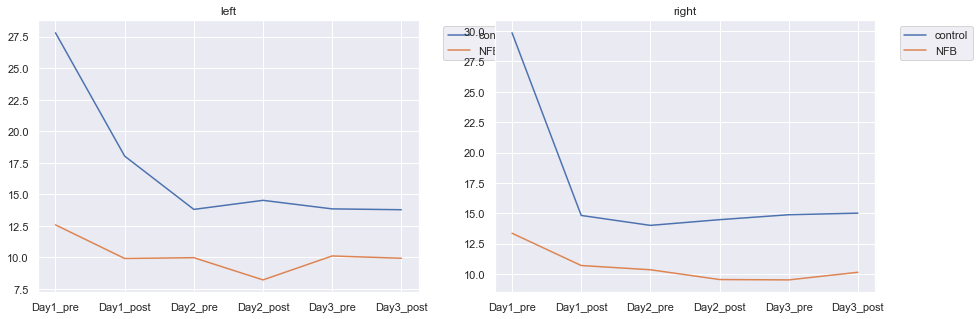

In [76]:
MI_Xaxis = ['Day1_pre', 'Day1_post', 'Day2_pre', 'Day2_post', 'Day3_pre', 'Day3_post']
data = summary.groupby(['condition', 'day', 'timing', 'hand'], sort=None, as_index=False).median()
plt.figure(figsize=(15, 5))
for i, hand in enumerate(['left', 'right']):
    plt.subplot(1, 2, i+1)
    plt.plot(MI_Xaxis, data[(data.condition == 'control') & (data.hand == hand)]['RT'], label='control')
    plt.plot(MI_Xaxis, data[(data.condition == 'continuous') & (data.hand == hand)]['RT'], label='NFB')
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.title(hand)

In [39]:
PTsummary = pd.DataFrame()
for pid in p_info['pid']:
    PT_data = pd.read_csv('result/' + pid + '_PT.csv', index_col=0)
    PTsummary = PTsummary.append(PT_data)

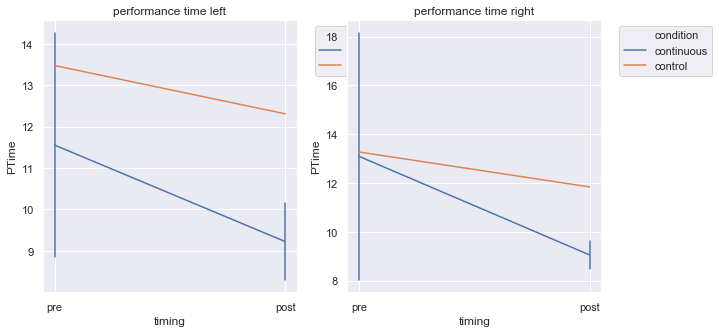

In [77]:
plt.figure(figsize=(10,5))
data = PTsummary.groupby(['pid', 'condition', 'timing', 'hand'], sort=None, as_index=False).median()
for i, hand in enumerate(['left', 'right']):
    plt.subplot(1, 2, i+1)
    sns.lineplot(x='timing', y='PTime', hue='condition', sort=False, err_style='bars', data=data[data.hand == hand])
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.title('performance time ' + hand)

In [78]:
PTsummary.groupby(['pid', 'condition', 'timing', 'hand'], sort=None, as_index=False).median()

,pid,condition,timing,hand,trial,PTime
0,tani,continuous,pre,right,0,18.155197
1,tani,continuous,pre,left,0,14.263131
2,tani,continuous,post,right,1,9.639115
3,tani,continuous,post,left,1,10.148305
4,Yu,continuous,pre,right,1,8.032142
5,Yu,continuous,pre,left,1,8.842518
6,Yu,continuous,post,right,1,8.468391
7,Yu,continuous,post,left,1,8.300608
8,Okubo,control,pre,right,1,13.270542
9,Okubo,control,pre,left,1,13.472461


In [79]:
MC_df = summary[(summary.day == 'Day1') & (summary.timing == 'pre') & (summary.hand == 'left')].groupby(['pid', 'condition', 'day', 'timing', 'hand'], sort=None, as_index=False).median()
MC_df['PT'] = PTsummary[(PTsummary.timing == 'pre') & (PTsummary.hand == 'left')].groupby(['pid', 'condition', 'timing', 'hand'], sort=None, as_index=False).mean()['PTime']

In [80]:
data = summary[(summary.day == 'Day1') & (summary.timing == 'pre') & (summary.hand == 'right')].groupby(['pid', 'condition', 'day', 'timing', 'hand'], sort=None, as_index=False).median()
data['PT'] = PTsummary[(PTsummary.timing == 'pre') & (PTsummary.hand == 'right')].groupby(['pid', 'condition', 'timing', 'hand'], sort=None, as_index=False).mean()['PTime']
MC_df = MC_df.append(data)

In [81]:
data = summary[(summary.day == 'Day3') & (summary.timing == 'post') & (summary.hand == 'left')].groupby(['pid', 'condition', 'day', 'timing', 'hand'], sort=None, as_index=False).median()
data['PT'] = PTsummary[(PTsummary.timing == 'post') & (PTsummary.hand == 'left')].groupby(['pid', 'condition', 'timing', 'hand'], sort=None, as_index=False).mean()['PTime']
MC_df = MC_df.append(data)

In [82]:
data = summary[(summary.day == 'Day3') & (summary.timing == 'post') & (summary.hand == 'right')].groupby(['pid', 'condition', 'day', 'timing', 'hand'], sort=None, as_index=False).median()
data['PT'] = PTsummary[(PTsummary.timing == 'post') & (PTsummary.hand == 'right')].groupby(['pid', 'condition', 'timing', 'hand'], sort=None, as_index=False).mean()['PTime']
MC_df = MC_df.append(data)

In [83]:
MC_df['MC'] = abs(MC_df['RT'] - MC_df['PT'])

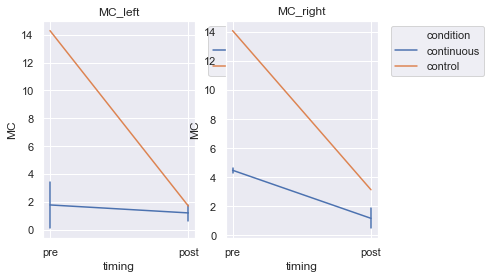

In [84]:
for i, hand in enumerate(['left', 'right']):
    plt.subplot(1, 2, i+1)
    sns.lineplot(x='timing', y='MC', hue='condition', sort=False, err_style='bars', data=MC_df[MC_df.hand == hand])
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.title('MC_' + hand)

In [85]:
MC_df

,pid,condition,day,timing,hand,block,RT,PT,MC
0,tani,continuous,Day1,pre,left,2,14.161883,14.263131,0.101248
1,Yu,continuous,Day1,pre,left,2,12.526398,9.067651,3.458747
2,Okubo,control,Day1,pre,left,2,27.803195,13.511567,14.291628
0,tani,continuous,Day1,pre,right,2,13.853115,18.155197,4.302082
1,Yu,continuous,Day1,pre,right,2,12.863394,8.229601,4.633793
2,Okubo,control,Day1,pre,right,2,29.860504,15.769507,14.090997
0,tani,continuous,Day3,post,left,2,9.607786,10.225714,0.617929
1,Yu,continuous,Day3,post,left,2,10.407463,8.611024,1.796438
2,Okubo,control,Day3,post,left,2,13.784035,12.080211,1.703824
0,tani,continuous,Day3,post,right,2,10.014507,9.547842,0.466665


In [87]:
glob.glob('InstImage/day_flow/*.PNG')

['InstImage/day_flow\\proc_day1.png',
 'InstImage/day_flow\\proc_day2.png',
 'InstImage/day_flow\\proc_day3.png',
 'InstImage/day_flow\\スライド1.PNG',
 'InstImage/day_flow\\スライド10.PNG',
 'InstImage/day_flow\\スライド11.PNG',
 'InstImage/day_flow\\スライド12.PNG',
 'InstImage/day_flow\\スライド13.PNG',
 'InstImage/day_flow\\スライド14.PNG',
 'InstImage/day_flow\\スライド15.PNG',
 'InstImage/day_flow\\スライド16.PNG',
 'InstImage/day_flow\\スライド2.PNG',
 'InstImage/day_flow\\スライド3.PNG',
 'InstImage/day_flow\\スライド4.PNG',
 'InstImage/day_flow\\スライド5.PNG',
 'InstImage/day_flow\\スライド6.PNG',
 'InstImage/day_flow\\スライド7.PNG',
 'InstImage/day_flow\\スライド8.PNG',
 'InstImage/day_flow\\スライド9.PNG']

In [90]:
imgnameList = ['day_flow/スライド' + str(i) for i in range(1, 17)] 
imgnameList.append('back_right_0')

In [91]:
imgnameList

['day_flow/スライド1',
 'day_flow/スライド2',
 'day_flow/スライド3',
 'day_flow/スライド4',
 'day_flow/スライド5',
 'day_flow/スライド6',
 'day_flow/スライド7',
 'day_flow/スライド8',
 'day_flow/スライド9',
 'day_flow/スライド10',
 'day_flow/スライド11',
 'day_flow/スライド12',
 'day_flow/スライド13',
 'day_flow/スライド14',
 'day_flow/スライド15',
 'day_flow/スライド16',
 'back_right_0']